<a href="https://colab.research.google.com/github/beazy96/MNIST_exercises/blob/main/MNIST_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST MODEL

In [ ]:
# Import Pytorch
import torch
from torch import nn 

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
    
# Import matplotlib for visualisation
import matplotlib.pyplot as plt 

# Import tqdm for progress bar
from tqdm.auto import tqdm

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.0+cu118
torchvision version: 0.15.1+cu118


In [ ]:
import requests
from pathlib import Path

# Download helper function from github repo
if Path("helper_function.py").is_file():
  print("helper_functions.py alerady exists, skipping download")
else:
  print("Downloading helper function file")
  # Using raw Github url
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
      f.write(request.content)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 103381534.73it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 74225302.59it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25518952.79it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13340706.42it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
len(train_data), len(test_data) 

(60000, 10000)

In [ ]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape:torch.Size([1, 28, 28])


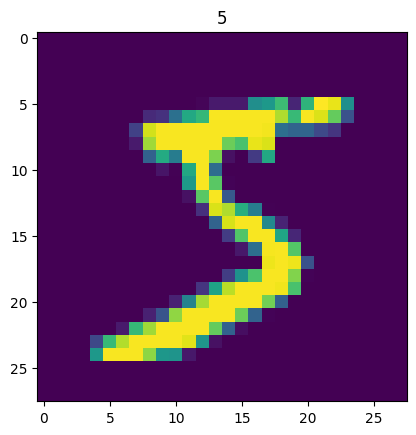

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

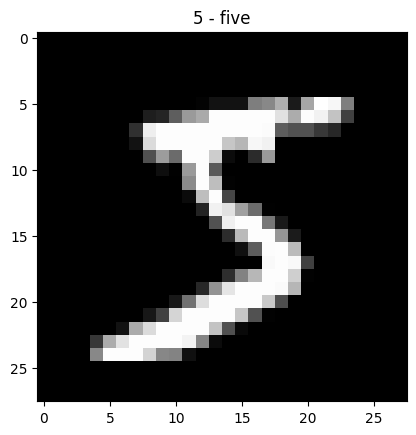

In [ ]:
plt.imshow(image.squeeze(), cmap="gray");
plt.title(class_names[label]);

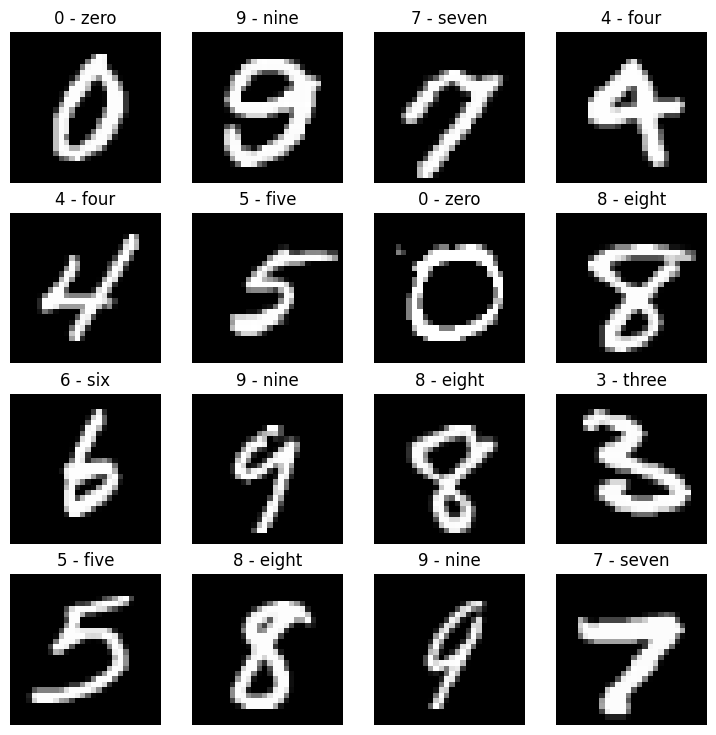

In [ ]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item() # .item returns tensor as a single a number  
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


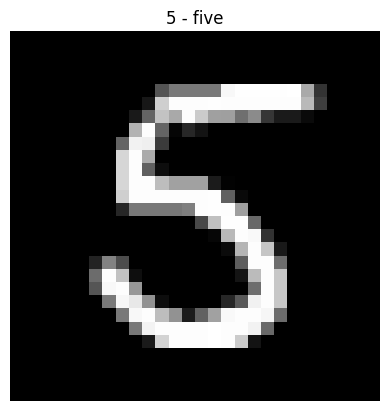

In [ ]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
class MNISTModelV0(nn.Module):
  def __init__(self, num_classes=10):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=32*7*7,
                  out_features=num_classes
        )
    )
  
  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = MNISTModelV0()
model_0

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")          

In [ ]:
torch.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Traning 
  train_step(model=model_0,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_0,
            data_loader=test_dataloader,
            accuracy_fn=accuracy_fn,
            loss_fn=loss_fn,
            device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.17221 | Train accuracy: 95.19%
Test loss: 0.07039 | Test accuracy: 97.93%

Epoch: 1
-------
Train loss: 0.06708 | Train accuracy: 97.92%
Test loss: 0.04601 | Test accuracy: 98.53%

Epoch: 2
-------
Train loss: 0.04992 | Train accuracy: 98.45%
Test loss: 0.04187 | Test accuracy: 98.47%



In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
model_0_results = eval_model(model=model_0,
                              data_loader=test_dataloader, 
                              loss_fn=loss_fn, 
                              accuracy_fn=accuracy_fn, 
                              device=device)
model_0_results

{'model_name': 'MNISTModelV0',
 'model_loss': 0.04189511761069298,
 'model_acc': 98.47244408945687}

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=25):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [ ]:
# Make predictions on test samples with model_2
pred_probs = make_predictions(model=model_0, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[5.2884e-08, 1.2255e-06, 9.9999e-01, 6.4066e-07, 1.2223e-13, 7.3901e-12,
         4.2170e-11, 3.1937e-08, 4.8446e-06, 7.7650e-09],
        [7.6349e-07, 9.9631e-01, 2.5967e-05, 3.6199e-06, 5.5517e-04, 8.3614e-04,
         3.1808e-04, 5.6387e-05, 1.7599e-03, 1.3677e-04]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1, 1, 2, 8, 9, 0, 1, 2, 8, 8, 9, 6, 2, 9, 3, 2,
        2])

In [ ]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([2, 1, 2, 4, 6, 6, 4, 9, 1, 1, 2, 8, 9, 0, 1, 2, 8, 8, 9, 6, 2, 9, 3, 2, 2],
 tensor([2, 1, 2, 4, 6, 6, 4, 9, 1, 1, 2, 8, 9, 0, 1, 2, 8, 8, 9, 6, 2, 9, 3, 2,
         2]))

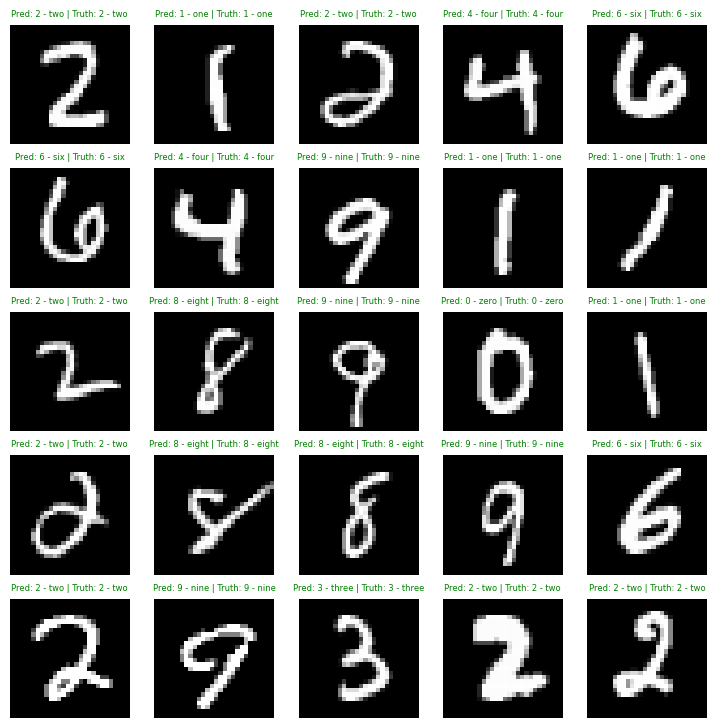

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 5
ncols = 5
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=6, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=6, c="blue") # red text if wrongs
  plt.axis(False);

In [ ]:
import random

test_samples = []
test_labels = []
for sample, label in list(test_data):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 7 (7 - seven)


In [ ]:
# Make predictions on test samples with model_2
pred_probs = make_predictions(model=model_0, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.2126e-09, 6.3444e-10, 8.8293e-08, 5.0010e-08, 1.1996e-11, 1.0824e-10,
         8.7286e-15, 1.0000e+00, 2.7911e-09, 6.2347e-08],
        [2.7494e-05, 1.3235e-04, 9.9980e-01, 8.0336e-08, 1.0598e-08, 3.6525e-09,
         3.7828e-05, 4.2122e-12, 5.5039e-07, 3.0050e-10]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 2, 1,  ..., 4, 5, 6])

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.0 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


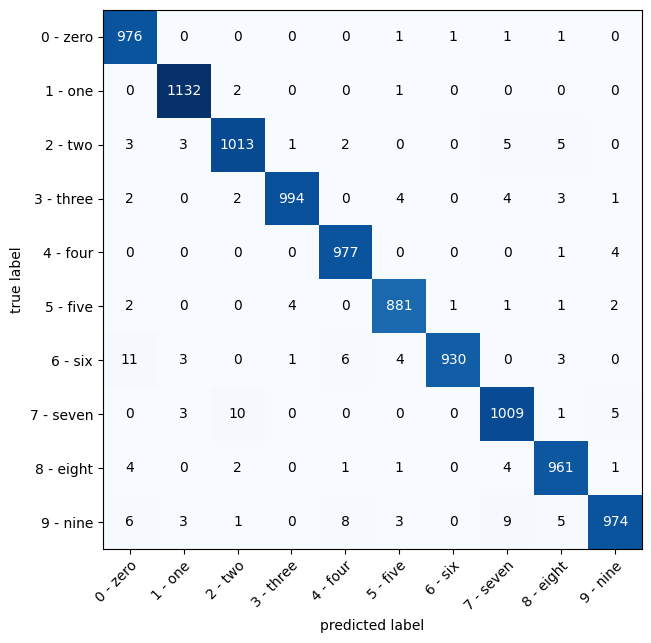

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=pred_probs,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [ ]:
# Import base libraries
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "liczby"

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

Did not find data/liczby directory, creating one...


In [ ]:
custom_image_path = image_path / "dupa.png"

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[5, 5, 5,  ..., 3, 3, 3],
         [5, 5, 5,  ..., 3, 3, 3],
         [5, 5, 5,  ..., 3, 3, 3],
         ...,
         [4, 4, 4,  ..., 4, 4, 5],
         [4, 4, 4,  ..., 4, 4, 5],
         [4, 4, 5,  ..., 4, 5, 5]],

        [[5, 5, 5,  ..., 3, 3, 3],
         [5, 5, 5,  ..., 3, 3, 3],
         [5, 5, 5,  ..., 3, 3, 3],
         ...,
         [4, 4, 5,  ..., 5, 5, 5],
         [5, 5, 5,  ..., 5, 5, 5],
         [5, 5, 5,  ..., 5, 5, 5]],

        [[4, 5, 5,  ..., 4, 4, 4],
         [5, 5, 5,  ..., 3, 3, 4],
         [5, 5, 5,  ..., 3, 3, 3],
         ...,
         [4, 4, 5,  ..., 4, 5, 4],
         [5, 5, 5,  ..., 4, 5, 4],
         [5, 5, 5,  ..., 4, 5, 4]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 59, 60])

Custom image dtype: torch.uint8


In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Devide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.0196, 0.0196, 0.0196,  ..., 0.0118, 0.0118, 0.0118],
         [0.0196, 0.0196, 0.0196,  ..., 0.0118, 0.0118, 0.0118],
         [0.0196, 0.0196, 0.0196,  ..., 0.0118, 0.0118, 0.0118],
         ...,
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0196],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0196],
         [0.0157, 0.0157, 0.0196,  ..., 0.0157, 0.0196, 0.0196]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0118, 0.0118, 0.0118],
         [0.0196, 0.0196, 0.0196,  ..., 0.0118, 0.0118, 0.0118],
         [0.0196, 0.0196, 0.0196,  ..., 0.0118, 0.0118, 0.0118],
         ...,
         [0.0157, 0.0157, 0.0196,  ..., 0.0196, 0.0196, 0.0196],
         [0.0196, 0.0196, 0.0196,  ..., 0.0196, 0.0196, 0.0196],
         [0.0196, 0.0196, 0.0196,  ..., 0.0196, 0.0196, 0.0196]],

        [[0.0157, 0.0196, 0.0196,  ..., 0.0157, 0.0157, 0.0157],
         [0.0196, 0.0196, 0.0196,  ..., 0.0118, 0.0118, 0.0157],
         [0.0196, 0.0196, 0.0196,  ..

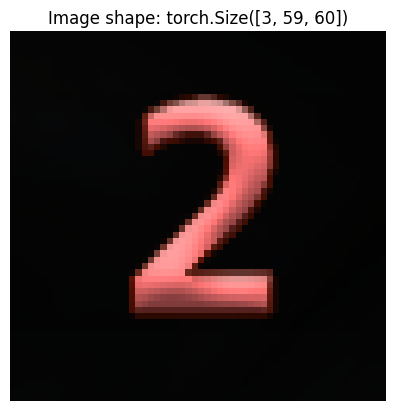

In [ ]:
import matplotlib.pyplot as plt

# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(1)
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 59, 60])
New shape: torch.Size([1, 28, 28])


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


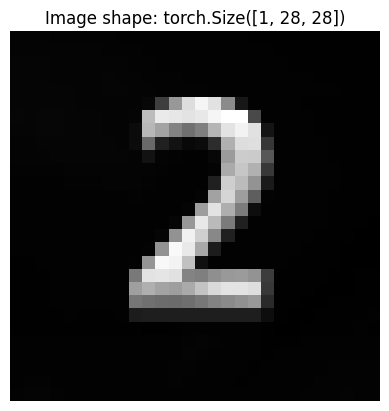

In [ ]:
plt.imshow(custom_image_transformed.squeeze(), cmap="gray")
plt.title(f"Image shape: {custom_image_transformed.shape}")
plt.axis(False);

In [ ]:
model_0.eval()
with torch.inference_mode():
  target_image = custom_image_transformed.unsqueeze(dim=0)
  target_image_pred = model_0(target_image.to(device))
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
target_image_pred_label
print(f"Prob: {target_image_pred_probs.max().cpu():.3f}")

Prob: 0.982


In [ ]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "liczby.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models/liczby.pth
